Target Parameters are Efficiency_Status                
Features are Usage_Hours,Energy_Consumption,User_Preferences ,Malfunction_Count,Device_Age,Device_Type

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np


In [3]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/Machine Learning/smart_home_device_usage_data.csv")   # <-- replace with actual file name
df.head()


,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1


EDA

In [4]:
df.shape

(5403, 8)

In [5]:
df.columns

Index(['UserID', 'DeviceType', 'UsageHoursPerDay', 'EnergyConsumption',
       'UserPreferences', 'MalfunctionIncidents', 'DeviceAgeMonths',
       'SmartHomeEfficiency'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [7]:
df.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


In [8]:
df.isna().sum()

,0
UserID,0
DeviceType,0
UsageHoursPerDay,0
EnergyConsumption,0
UserPreferences,0
MalfunctionIncidents,0
DeviceAgeMonths,0
SmartHomeEfficiency,0


In [9]:
df.dropna(inplace=True) #dropna is used for dropping null values ,incase if we have got any null values above so we can drop it using

In [10]:
df.skew(numeric_only=True) #Calculate skewness for all numeric columns and ignore non-numeric (string, date, etc.) columns.

,0
UserID,0.000000
UsageHoursPerDay,0.049886
EnergyConsumption,0.008125
UserPreferences,-0.047037
MalfunctionIncidents,-0.076298
DeviceAgeMonths,-0.009516
SmartHomeEfficiency,0.509310


In [11]:
import seaborn as sns # Seaborn (import seaborn as sns)
 #→ Built on top of Matplotlib. Makes beautiful, statistical plots with less code.

In [12]:
import matplotlib.pyplot as plt #Matplotlib (import matplotlib.pyplot as plt)
# → Base plotting library in Python. It provides low-level control over plots.

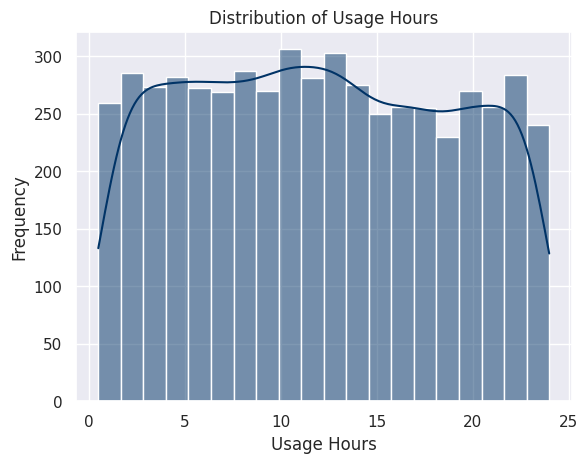

In [13]:
sns.set_theme(style="darkgrid")
sns.histplot(df["UsageHoursPerDay"], kde=True, bins=20, color="#003366")
plt.title("Distribution of Usage Hours")
plt.xlabel("Usage Hours")
plt.ylabel("Frequency")
plt.show()

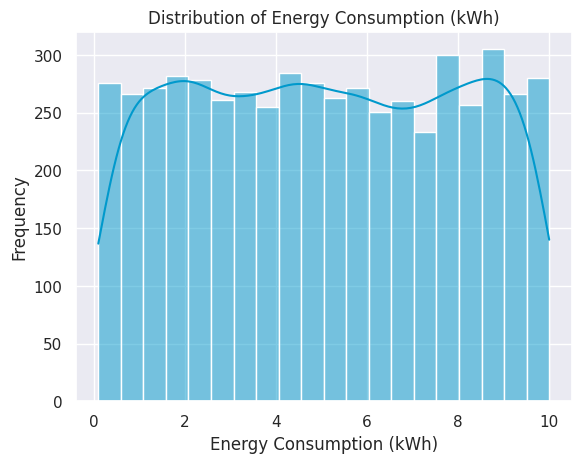

In [14]:
sns.set_theme(style="darkgrid")
sns.histplot(df["EnergyConsumption"], kde=True, bins=20, color="#0099cc")
plt.title("Distribution of Energy Consumption (kWh)")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Frequency")
plt.show()

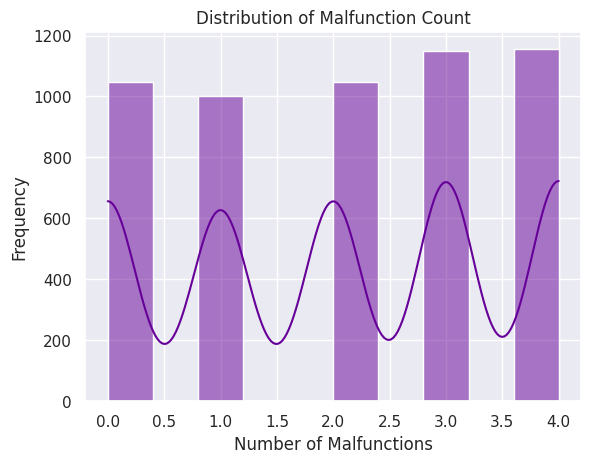

In [15]:
sns.set_theme(style="darkgrid")
sns.histplot(df["MalfunctionIncidents"], kde=True, bins=10, color="#660099")
plt.title("Distribution of Malfunction Count")
plt.xlabel("Number of Malfunctions")
plt.ylabel("Frequency")
plt.show()

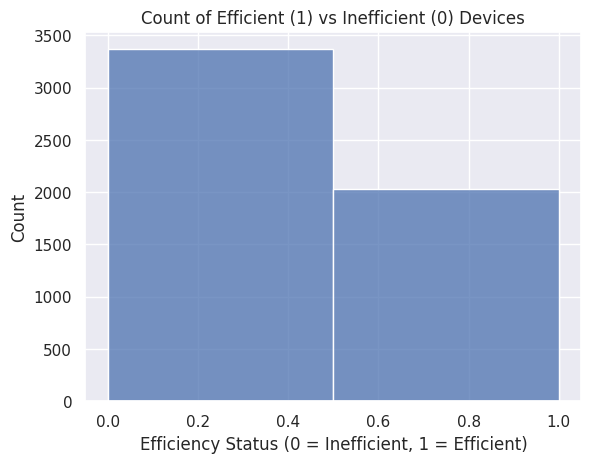

In [16]:
sns.set_theme(style="darkgrid")
sns.histplot(df["SmartHomeEfficiency"], bins=2)
plt.title("Count of Efficient (1) vs Inefficient (0) Devices")
plt.xlabel("Efficiency Status (0 = Inefficient, 1 = Efficient)")
plt.ylabel("Count")
plt.show()

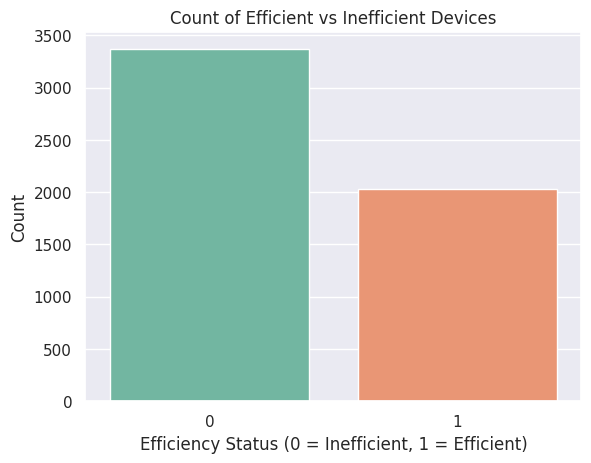

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x="SmartHomeEfficiency", data=df, hue="SmartHomeEfficiency", palette="Set2", legend=False)
plt.title("Count of Efficient vs Inefficient Devices")
plt.xlabel("Efficiency Status (0 = Inefficient, 1 = Efficient)")
plt.ylabel("Count")
plt.show()

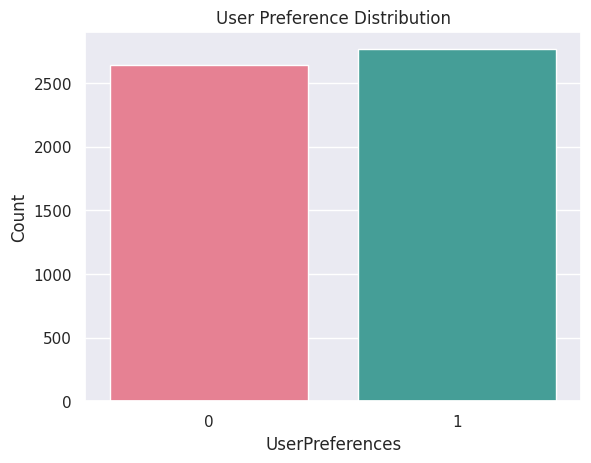

In [18]:
sns.countplot(x="UserPreferences", data=df, hue="UserPreferences", palette="husl", legend=False)
plt.title("User Preference Distribution")
plt.xlabel("UserPreferences")
plt.ylabel("Count")
plt.show()

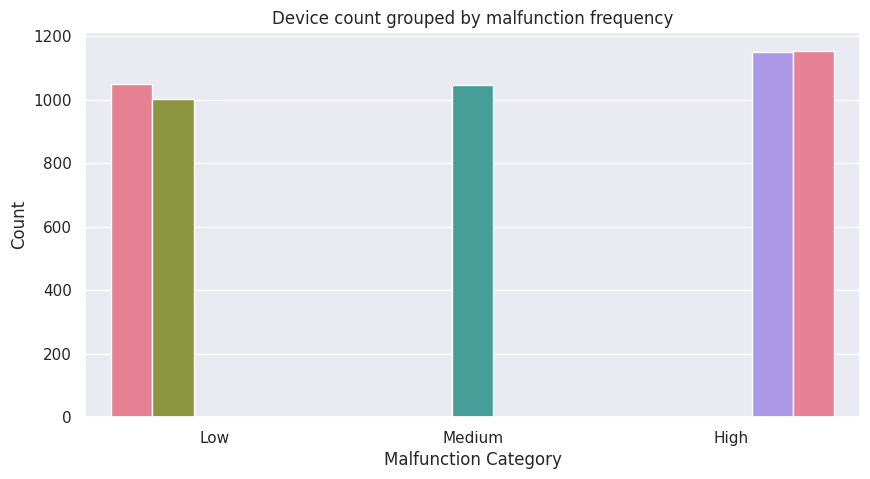

In [19]:
df["MalfunctionBin"] = pd.cut(df["MalfunctionIncidents"], bins=3, labels=["Low", "Medium", "High"])
plt.figure(figsize=(10, 5)) # Added to increase figure size
sns.countplot(x="MalfunctionBin", data=df,  hue="MalfunctionIncidents", palette="husl", legend=False)
plt.title("Device count grouped by malfunction frequency")
plt.xlabel("Malfunction Category")
plt.ylabel("Count")
plt.show()

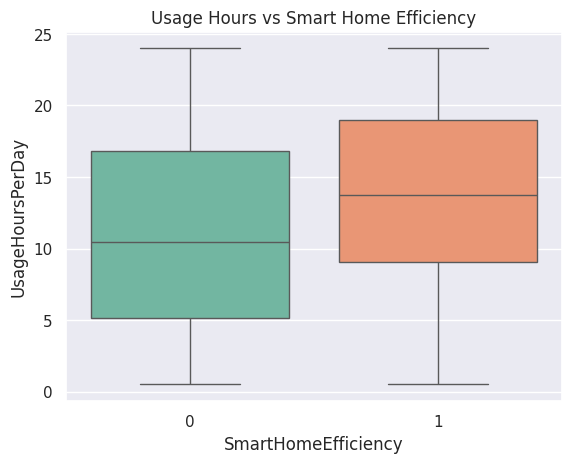

In [20]:
sns.boxplot(x="SmartHomeEfficiency", y="UsageHoursPerDay", data=df, hue="SmartHomeEfficiency" ,palette="Set2" ,legend=False)
plt.title("Usage Hours vs Smart Home Efficiency")
plt.show()

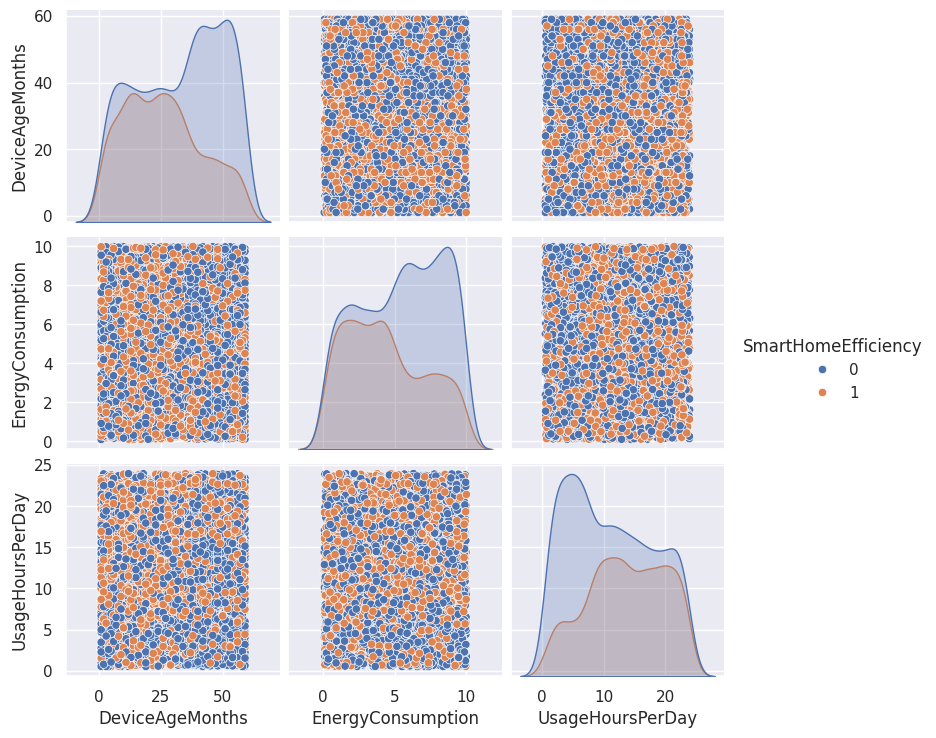

In [21]:
sns.pairplot(df[['DeviceAgeMonths','EnergyConsumption','UsageHoursPerDay','SmartHomeEfficiency']], hue='SmartHomeEfficiency')

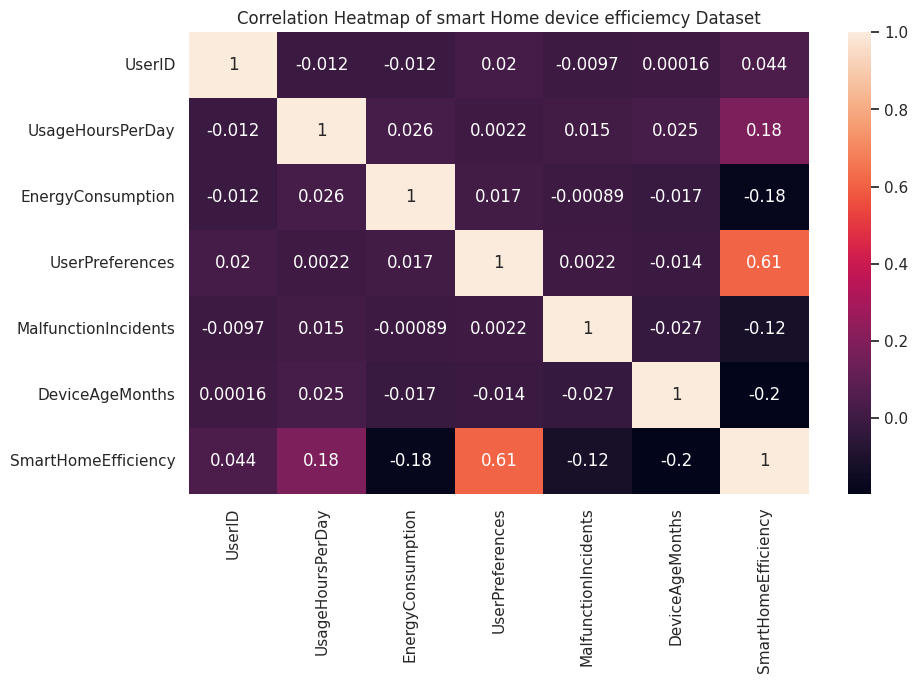

In [22]:
plt.figure(figsize=(10,6))
numeric_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_data.corr(),annot=True) # for showing no.s annot=True # here error is due to some values are in the categorical
plt.title("Correlation Heatmap of smart Home device efficiemcy Dataset")
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler
rs=StandardScaler()

# Select numerical columns excluding the target variable
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('SmartHomeEfficiency') # Corrected: 'charges' replaced with 'SmartHomeEfficiency'

# Apply scaling to the selected numerical columns
df[numerical_cols] = rs.fit_transform(df[numerical_cols])

In [24]:
# splitting the data
from sklearn.model_selection import train_test_split # we are importing the data for train & test

In [25]:
X = df.drop("SmartHomeEfficiency", axis=1)  # Corrected: use 'SmartHomeEfficiency' as the target column
y = df["SmartHomeEfficiency"]

In [26]:
# splitting for train and test
from sklearn.model_selection import train_test_split # Added import statement
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42 ) # Changed 'x' to 'X'
# we can write anything instead of 42 its ideal 42

In [27]:
# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Apply one-hot encoding to training data
x_train_encoded = pd.get_dummies(x_train, columns=categorical_cols, drop_first=True)

# Apply one-hot encoding to test data
x_test_encoded = pd.get_dummies(x_test, columns=categorical_cols, drop_first=True)

# Align columns - this is crucial if some categories are not present in both train and test sets
x_train_encoded, x_test_encoded = x_train_encoded.align(x_test_encoded, join='left', axis=1, fill_value=0)

from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model on the encoded training data
lr.fit(x_train_encoded, y_train)

LinearRegression()

In [28]:
# predicting
y_pred=lr.predict(x_test_encoded)

In [29]:
# imprting libraries for
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [30]:
# mean absoute error = avg of error ky range me model galat peform krta h
# mean sq error = sq kr deta h error ka
#r2 jeetba closer to 1 h utna aacha perform kr rha h jab 0 k aspas h toh bura perform kr rha h
# if its in -ve toh sabse bura h vo
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2) # value mostly 90% k uppar  kahi par bhi aur ye 99% or 1% ni chaiye hame

MAE is 0.27502695870808674
MSE is 0.11538267424324238
R2 is 0.5065339848029252


In [31]:
# decision tree
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train_encoded,y_train)

y_pred_dtr=dtr.predict(x_test_encoded)

In [32]:
mae=mean_absolute_error(y_test,y_pred_dtr)
mse=mean_squared_error(y_test,y_pred_dtr)
r2=r2_score(y_test,y_pred_dtr)

In [33]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 0.04625346901017576
MSE is 0.04625346901017576
R2 is 0.8021842084074456


In [34]:
# Random Tree
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor(n_estimators=100,random_state=42)
rfr.fit(x_train_encoded,y_train)

y_pred_rfr=rfr.predict(x_test_encoded)

In [35]:
mae=mean_absolute_error(y_test,y_pred_rfr)
mse=mean_squared_error(y_test,y_pred_rfr)
r2=r2_score(y_test,y_pred_rfr)

In [36]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 0.05049028677150787
MSE is 0.029556891766882514
R2 is 0.8735917528565259


In [37]:
# for XG boost
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train_encoded,y_train)

GradientBoostingRegressor()

In [38]:
y_pred_gbr = gbr.predict(x_test_encoded)
mae=mean_absolute_error(y_test,y_pred_gbr)
mse=mean_squared_error(y_test,y_pred_gbr)
r2=r2_score(y_test,y_pred_gbr)

In [39]:
print("MAE is",mae)
print("MSE is",mse)
print("R2 is",r2)

MAE is 0.17958349788350206
MSE is 0.06086727709000794
R2 is 0.7396842040757126


In [40]:
# konsa column hame sabse zyda useful h for building model
# for random forest since uska r ka value zyda h
importance=rfr.feature_importances_  # features ka naam h
# Get feature names after one-hot encoding
features = x_train_encoded.columns # Corrected: use x_train_encoded.columns to get feature names

In [41]:
# Creating Data Frame
fea_imp= pd.DataFrame({"Features":features,"Importance":importance})

In [42]:
fea_imp.head()

,Features,Importance
0,UserID,0.109176
1,UsageHoursPerDay,0.141976
2,EnergyConsumption,0.147897
3,UserPreferences,0.365039
4,MalfunctionIncidents,0.090070


In [43]:
# value as per imprtance
fea_imp=fea_imp.sort_values(by="Importance",ascending=False)

In [44]:
fea_imp.head()

,Features,Importance
3,UserPreferences,0.365039
2,EnergyConsumption,0.147897
1,UsageHoursPerDay,0.141976
5,DeviceAgeMonths,0.132791
0,UserID,0.109176


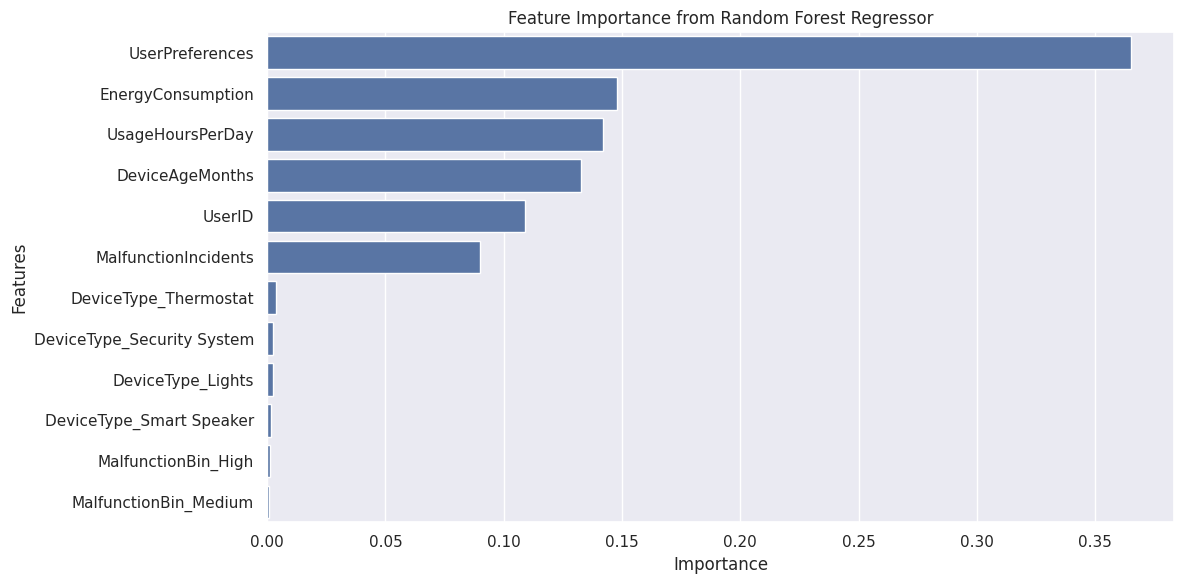

In [45]:
# we are going to visualize it by horizontal bar grph
plt.figure(figsize=(12,6)) # Increased figure size for better readability
sns.barplot(data=fea_imp, x="Importance", y="Features")
plt.xticks(rotation=0) # Rotate x-axis labels for better readability
plt.title("Feature Importance from Random Forest Regressor")
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

In [46]:
import pandas as pd

# Create a dictionary to store the metrics for each model
model_performance = {
    'Model': ['Linear Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],
    'MAE': [mean_absolute_error(y_test, y_pred), mean_absolute_error(y_test, y_pred_dtr), mean_absolute_error(y_test, y_pred_rfr)],
    'MSE': [mean_squared_error(y_test, y_pred), mean_squared_error(y_test, y_pred_dtr), mean_squared_error(y_test, y_pred_rfr)],
    'R2': [r2_score(y_test, y_pred), r2_score(y_test, y_pred_dtr), r2_score(y_test, y_pred_rfr)]
}

# Create a pandas DataFrame from the dictionary
performance_df = pd.DataFrame(model_performance)

# Display the DataFrame
display(performance_df)

,Model,MAE,MSE,R2
0,Linear Regression,0.275027,0.115383,0.506534
1,Decision Tree Regressor,0.046253,0.046253,0.802184
2,Random Forest Regressor,0.050490,0.029557,0.873592


In [47]:
# Save the best performing model (Random Forest Regressor)
import joblib
filename = 'random_forest_regressor_model.joblib'
joblib.dump(rfr, filename)

# Download the saved model file
# files.download(filename)

['random_forest_regressor_model.joblib']

In [48]:
from google.colab import files

# Download the saved model file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [50]:
uploaded=files.upload()

Saving random_forest_regressor_model (8).joblib to random_forest_regressor_model (8).joblib


In [51]:
import joblib

# The file was uploaded and is available in the Colab environment.
# The filename from the upload is 'random_forest_regressor_model (8).joblib'.
# We can directly load it using joblib.load()

loaded_model = joblib.load('random_forest_regressor_model (8).joblib')

# You can now use the loaded_model for making predictions or further analysis
print("Model loaded successfully!")

Model loaded successfully!
